# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:
* Conduct t-tests and an ANOVA on a real-world dataset and interpret the results

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [1]:
#Your code here
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("darkgrid")

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


In [2]:
data = pd.read_csv("multipleChoiceResponses_cleaned.csv")
data.head()

<ipython-input-2-48cfdfd831fa>:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("multipleChoiceResponses_cleaned.csv")


,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,NaN,NaN
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,250000.0
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26394 entries, 0 to 26393
Columns: 230 entries, GenderSelect to AdjustedCompensation
dtypes: float64(15), object(215)
memory usage: 46.3+ MB


In [32]:
data.shape

(26394, 230)

## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

You may import the functions stored in the `flatiron_stats.py` file to help perform your hypothesis tests. It contains the stats functions that you previously coded: `welch_t(a,b)`, `welch_df(a, b)`, and `p_value(a, b, two_sided=False)`. 

Note that `scipy.stats.ttest_ind(a, b, equal_var=False)` performs a two-sided Welch's t-test and that p-values derived from two-sided tests are two times the p-values derived from one-sided tests. See the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) for more information.    

In [63]:
#Your code here
# Master's degree holders form majority of this data set
data.FormalEducation.value_counts().sort_values(ascending = False)

Master's degree                                                      8204
Bachelor's degree                                                    4811
Doctoral degree                                                      3543
Some college/university study without earning a bachelor's degree     786
Professional degree                                                   451
I did not complete any formal education past high school              257
I prefer not to answer                                                 90
Name: FormalEducation, dtype: int64

In [88]:
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [84]:
# something
filtered_ = data[(~data["FormalEducation"].isnull()) & (~data["AdjustedCompensation"].isnull())]
filtered_.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,250000.0
8,Female,Australia,43.0,Employed full-time,NaN,NaN,Yes,NaN,Business Analyst,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.802310,64184.8
9,Male,Russia,33.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017402,20882.4
11,Male,India,27.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015620,1483.9
14,Male,Taiwan,26.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033304,36634.4


In [85]:
master_compen = filtered_[filtered_["FormalEducation"] == "Master's degree"]["AdjustedCompensation"]
bachelor_compen = filtered_[filtered_["FormalEducation"] == "Bachelor's degree"]["AdjustedCompensation"]

In [154]:
print("Master series size: ", len(master_compen))
print("Bachelor Series size", len(bachelor_compen))

Master series size:  1990
Bachelor Series size 1107


<AxesSubplot:xlabel='AdjustedCompensation', ylabel='Density'>

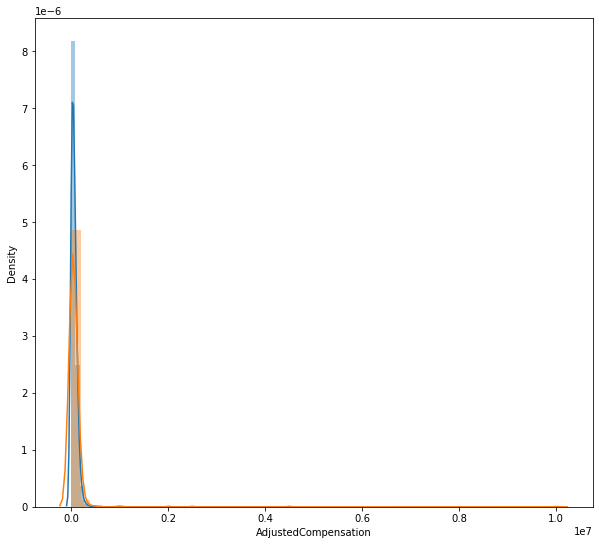

In [89]:
fig, ax = plt.subplots(figsize = (10, 9))
sns.distplot(master_compen)
sns.distplot(bachelor_compen)

In [106]:
# Bachelor's holders adjusted details
bach_mean = bachelor_compen.mean()
bach_median = bachelor_compen.median()
bach_std = bachelor_compen.std()

# Master's holders adjusted details
mast_mean = master_compen.mean()
mast_median = master_compen.median()
mast_std = master_compen.std()

print(f"Masters AdjustedCompensation:\tMean: {round(mast_mean, 2)} Median: {round(mast_median, 2)} Std: {round(mast_std, 2)}")
print(f"Bachelors AdjustedCompensation:\tMean: {round(bach_mean, 2)} Median: {round(bach_median, 2)} Std: {round(bach_std, 2)}")

Masters AdjustedCompensation:	Mean: 69139.9 Median: 53812.17 Std: 135527.21
Bachelors AdjustedCompensation:	Mean: 64887.1 Median: 38399.4 Std: 306935.87


In [116]:
# With the high degree of variation in the standard deviations between the two variables with varying sample sizes.
# it is sensible to use the Welch's Test
values = stats.ttest_ind(master_compen, bachelor_compen, equal_var = False)
p_value = round(values.pvalue, 3) / 2
print("The pvalue in the statistic is: ",p_value)

The pvalue in the statistic is:  0.331


In [121]:
master_compen[master_compen >= master_compen.quantile(.99)].count()
master_compen.quantile(1)

4498900.0

In [125]:
bachelor_compen[bachelor_compen > bachelor_compen.quantile(.99)].count()
bachelor_compen.quantile(1)

9999999.0

In [130]:
# Setting an upper cut off point of 500000
# To get rid of upper outliers
cut = 500000
bills = "AdjustedCompensation"
edu = "FormalEducation"
ed_l1 = "Master's degree"
ed_l2 = "Bachelor's degree"
groupM = filtered_[(filtered_[edu] == ed_l1) & (filtered_[bills] <= cut)][bills]
groupB = filtered_[(filtered_[edu] == ed_l2) & (filtered_[bills] <= cut)][bills]

In [131]:
# Bachelor's holders adjusted after filtering outliers details
groupB_mean = groupB.mean()
groupB_median = groupB.median()
groupB_std = groupB.std()

# Master's holders adjusted after filtering outliers details
groupM_mean = groupM.mean()
groupM_median = groupM.median()
groupM_std = groupM.std()

print(f"Masters AdjustedCompensation:\tMean: {round(groupM_mean, 2)} Median: {round(groupM_median, 2)} Std: {round(groupM_std, 2)}")
print(f"Bachelors AdjustedCompensation:\tMean: {round(groupB_mean, 2)} Median: {round(groupB_median, 2)} Std: {round(groupB_std, 2)}")

Masters AdjustedCompensation:	Mean: 63976.63 Median: 53539.72 Std: 55340.99
Bachelors AdjustedCompensation:	Mean: 53744.35 Median: 38292.15 Std: 55285.48


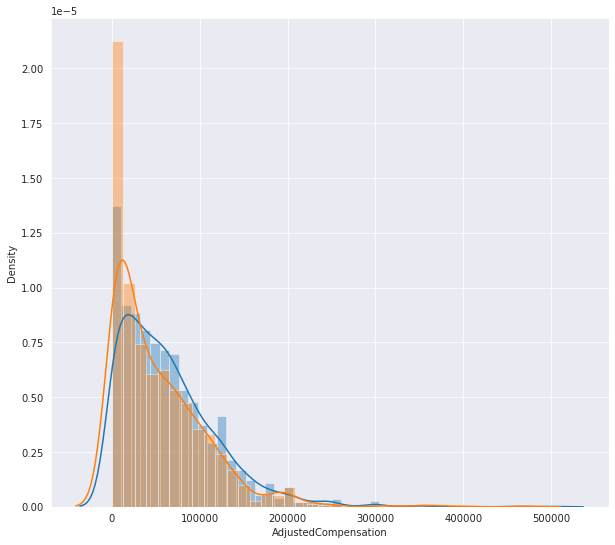

In [137]:
fig, ax = plt.subplots(figsize = (10, 9))
sns.distplot(groupM)
sns.distplot(groupB);

## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

In [11]:
#Your code here

Median Values: 
s1:74131.92 
s2:38399.4
Sample sizes: 
s1: 967 
s2: 1107
Welch's t-test p-value: 0.1568238199472023


Repeated Test with Ouliers Removed:
Sample sizes: 
s1: 964 
s2: 1103
Welch's t-test p-value with outliers removed: 0.0


In [138]:
filtered_.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,250000.0
8,Female,Australia,43.0,Employed full-time,NaN,NaN,Yes,NaN,Business Analyst,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.802310,64184.8
9,Male,Russia,33.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017402,20882.4
11,Male,India,27.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015620,1483.9
14,Male,Taiwan,26.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033304,36634.4


In [144]:
c1 = "FormalEducation"
c2 = "AdjustedCompensation"
ed_l3 = "Doctoral degree"

In [145]:
doctor_compen = filtered_[filtered_[c1] == ed_l3][c2]

In [155]:
print("Doctoral series size: ", len(doctor_compen))
print("Bachelor Series size", len(bachelor_compen))

Doctoral series size:  967
Bachelor Series size 1107


In [152]:
# Bachelor's holders adjusted details
bach_mean = bachelor_compen.mean()
bach_median = bachelor_compen.median()
bach_std = bachelor_compen.std()

# Doctoral holders adjusted details
doc_mean = doctor_compen.mean()
doc_median = doctor_compen.median()
doc_std = doctor_compen.std()

print(f"Doctoral AdjustedCompensation:\tMean: {round(doc_mean, 2)} Median: {round(doc_median, 2)} Std: {round(doc_std, 2)}")
print(f"Bachelors AdjustedCompensation:\tMean: {round(bach_mean, 2)} Median: {round(bach_median, 2)} Std: {round(bach_std, 2)}")

Doctoral AdjustedCompensation:	Mean: 29566175.76 Median: 74131.92 Std: 909998082.33
Bachelors AdjustedCompensation:	Mean: 64887.1 Median: 38399.4 Std: 306935.87


In [153]:
# With the high degree of variation in the standard deviations between the two variables with varying sample sizes.
# it is sensible to use the Welch's Test
values = stats.ttest_ind(doctor_compen, bachelor_compen, equal_var = False)
p_value = round(values.pvalue, 3) / 2
print("The pvalue in the statistic is: ",p_value)

The pvalue in the statistic is:  0.157


In [ ]:
# Removing outliers in the doctoral series

In [158]:
groupB
groupD = filtered_[(filtered_[c1] == ed_l3) & (filtered_[bills] <= cut)][bills]

In [159]:
groupD

22       100000.000
32       172144.440
34       133000.000
61        15000.000
72        43049.736
            ...    
25875     71749.560
25966     12000.000
26012    123553.200
26038    170000.000
26203    200000.000
Name: AdjustedCompensation, Length: 964, dtype: float64

In [160]:
# Bachelor's holders adjusted after filtering outliers details
groupB_mean = groupB.mean()
groupB_median = groupB.median()
groupB_std = groupB.std()

# Doctoral holders adjusted after filtering outliers details
groupD_mean = groupD.mean()
groupD_median = groupD.median()
groupD_std = groupD.std()

print(f"Doctoral AdjustedCompensation:\tMean: {round(groupD_mean, 2)} Median: {round(groupD_median, 2)} Std: {round(groupD_std, 2)}")
print(f"Bachelors AdjustedCompensation:\tMean: {round(groupB_mean, 2)} Median: {round(groupB_median, 2)} Std: {round(groupB_std, 2)}")

Doctoral AdjustedCompensation:	Mean: 86194.98 Median: 73152.77 Std: 65298.89
Bachelors AdjustedCompensation:	Mean: 53744.35 Median: 38292.15 Std: 55285.48


In [163]:
# With the high degree of variation in the standard deviations between the two variables with varying sample sizes.
# it is sensible to use the Welch's Test
values = stats.ttest_ind(groupB, groupD, equal_var = False)
p_value = round(values.pvalue, 2) / 2
print("The pvalue in the statistic is: ",p_value)

The pvalue in the statistic is:  0.0


## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

In [82]:
f1 = 'FormalEducation'
f2 = 'AdjustedCompensation'
f1c1 = "Master's degree"
f1c2 = "Bachelor's degree"
subset = data[(~data[f1].isnull()) & (~data[f2].isnull())]
s1 = subset[subset[f1]==f1c1][f2]
s2 = subset[subset[f1]==f1c2][f2]

In [165]:
#Your code here
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = '{} ~ C({})'.format(c2, c1)
lm = ols(formula, data).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                          sum_sq      df         F    PR(>F)
C(FormalEducation)  6.540294e+17     6.0  0.590714  0.738044
Residual            7.999414e+20  4335.0       NaN       NaN


In [166]:
holder = data[data[c2]<=5*10**5]
formula = '{} ~ C({})'.format(c2, c1)
lm = ols(formula, holder).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                          sum_sq      df          F        PR(>F)
C(FormalEducation)  5.841881e+11     6.0  29.224224  1.727132e-34
Residual            1.439270e+13  4320.0        NaN           NaN


## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!